```python

ql.UnitedStates()
ql.UnitedKingdom()
ql.SouthKorea()
ql.TARGET()  #유럽  Trans-Atlantic Region 어쩌구저쩌구
ql.China()

#BusincessDayConvention
ql.Unadjusted
ql.Preceding
ql.ModifiedPreceding
ql.Following
ql.ModifiedFollowing

#Fuctions
ql.Calendar().holidayList(date, date)  # 두 날짜 사이에 휴일이 어떤 것이 잇는지 보여줘
ql.Calendar().addHoliday(Date)
ql.Calendar().removeHoliday(Date)
ql.Calendar().businessDaysBetween(date, date)
ql.Calendar().isBusinessDay(date)
ql.Calendar().isHoliday(date)
ql.Calendar().isEndOfMonth(date)
ql.Calendar().advance(date, period, BusinessDayConvention)

ql.JointCalendar(calendar, calendar ....)
```

In [1]:
import QuantLib as ql

In [2]:
korea = ql.SouthKorea()
us = ql.UnitedStates()
uk = ql.UnitedKingdom()
hk = ql.HongKong()
eu = ql.TARGET()

In [3]:
korea.holidayList(ql.Date(1,1,2021), ql.Date(31,12,2021))

(Date(1,1,2021),
 Date(11,2,2021),
 Date(12,2,2021),
 Date(1,3,2021),
 Date(5,5,2021),
 Date(19,5,2021),
 Date(20,9,2021),
 Date(21,9,2021),
 Date(22,9,2021),
 Date(31,12,2021))

In [4]:
date1 = ql.Date(1,1,2020)
date2 = ql.Date(31, 12,2020)

print(korea.holidayList(date1, date2))
print()
print(hk.holidayList(date1, date2))

(Date(1,1,2020), Date(24,1,2020), Date(27,1,2020), Date(15,4,2020), Date(30,4,2020), Date(1,5,2020), Date(5,5,2020), Date(17,8,2020), Date(30,9,2020), Date(1,10,2020), Date(2,10,2020), Date(9,10,2020), Date(25,12,2020), Date(31,12,2020))

(Date(1,1,2020), Date(27,1,2020), Date(28,1,2020), Date(10,4,2020), Date(13,4,2020), Date(30,4,2020), Date(1,5,2020), Date(25,6,2020), Date(1,7,2020), Date(1,10,2020), Date(2,10,2020), Date(26,10,2020), Date(25,12,2020))


In [5]:
new_holiday = ql.Date(16, 8, 2021)
korea.addHoliday(new_holiday)

korea.holidayList(ql.Date(1,1,2021), ql.Date(31,12,2021))

(Date(1,1,2021),
 Date(11,2,2021),
 Date(12,2,2021),
 Date(1,3,2021),
 Date(5,5,2021),
 Date(19,5,2021),
 Date(16,8,2021),
 Date(20,9,2021),
 Date(21,9,2021),
 Date(22,9,2021),
 Date(31,12,2021))

In [6]:
korea.removeHoliday(ql.Date(16,8,2021))
korea.holidayList(ql.Date(1,1,2021), ql.Date(31,12,2021))

(Date(1,1,2021),
 Date(11,2,2021),
 Date(12,2,2021),
 Date(1,3,2021),
 Date(5,5,2021),
 Date(19,5,2021),
 Date(20,9,2021),
 Date(21,9,2021),
 Date(22,9,2021),
 Date(31,12,2021))

In [13]:
date1 = ql.Date(1, 1, 2021)
date2 = ql.Date(31, 12, 2021)

korea.businessDaysBetween(date1, date2)

251

-----------------------------------------------

In [15]:
korea.isHoliday(ql.Date(2,8,2020))

True

In [17]:
todaysDate = ql.Date(1,1,2020).todaysDate()

print(korea.isBusinessDay(todaysDate))
print(korea.isEndOfMonth(todaysDate))

True
False


```python
#BusincessDayConvention
ql.Unadjusted
ql.Preceding
ql.ModifiedPreceding
ql.Following
ql.ModifiedFollowing  #가장 많이 사용 / 휴일이랑 만기일 겹쳤을 때, 휴일 이후 만기일에 달이 바뀌면 휴일 전날로 만기일 조정. 그게 아니면 휴일 다음날로
```

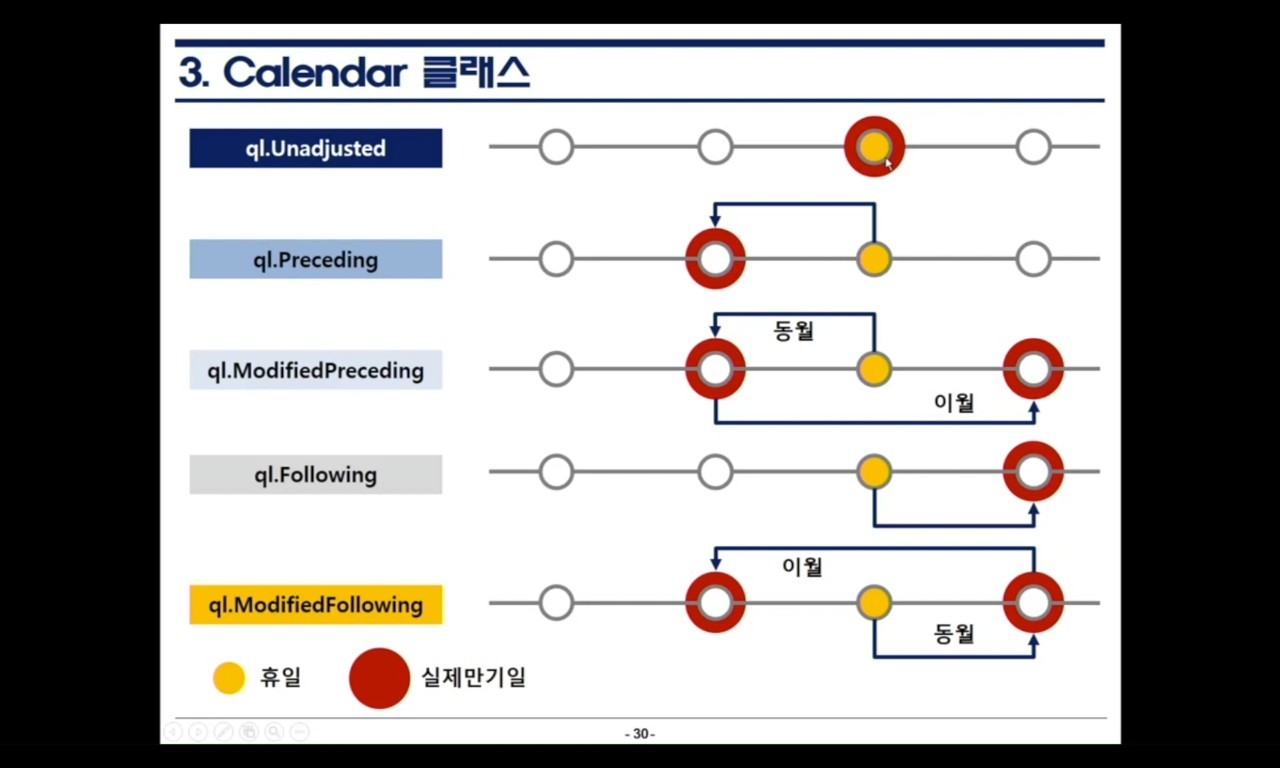

In [19]:
todaysDate = ql.Date().todaysDate()
three_month = ql.Period(3, ql.Months)

print(korea.advance(todaysDate, three_month, ql.Unadjusted))
print(korea.advance(todaysDate, three_month, ql.ModifiedFollowing))

November 2nd, 2021
November 2nd, 2021


In [29]:
todaysDate = ql.Date(24, 7, 2020)
three_month = ql.Period(3, ql.Months) #3개월에 한번...

print(korea.advance(todaysDate, three_month, ql.Unadjusted))  # 7월 24일 뒤인 3개월 뒤의 날짜로.
print(korea.advance(todaysDate, three_month, ql.ModifiedFollowing))  # 10월 24일은 휴일임. 따라서 26일인 월요일로 조정

October 24th, 2020
October 26th, 2020


In [20]:
date1 = ql.Date(1,1,2020)
date2 = ql.Date(31, 12,2020)

kr = ql.SouthKorea()
hk = ql.HongKong()
us = ql.UnitedStates()

new_calendar = ql.JointCalendar(kr, hk, us)
new_calendar.holidayList(date1, date2)

(Date(1,1,2020),
 Date(20,1,2020),
 Date(24,1,2020),
 Date(27,1,2020),
 Date(28,1,2020),
 Date(17,2,2020),
 Date(10,4,2020),
 Date(13,4,2020),
 Date(15,4,2020),
 Date(30,4,2020),
 Date(1,5,2020),
 Date(5,5,2020),
 Date(25,5,2020),
 Date(25,6,2020),
 Date(1,7,2020),
 Date(3,7,2020),
 Date(17,8,2020),
 Date(7,9,2020),
 Date(30,9,2020),
 Date(1,10,2020),
 Date(2,10,2020),
 Date(9,10,2020),
 Date(12,10,2020),
 Date(26,10,2020),
 Date(11,11,2020),
 Date(26,11,2020),
 Date(25,12,2020),
 Date(31,12,2020))

-------------------------------

1. 한국 달력에 임시공휴일 8월 17일을 추가하라



In [33]:
date1 = ql.Date(1,1,2020)
date2 = ql.Date(31, 12,2020)

korea = ql.SouthKorea()
korea.addHoliday(ql.Date(17,8,2020))
korea.holidayList(date1, date2)

(Date(1,1,2020),
 Date(24,1,2020),
 Date(27,1,2020),
 Date(15,4,2020),
 Date(30,4,2020),
 Date(1,5,2020),
 Date(5,5,2020),
 Date(17,8,2020),
 Date(30,9,2020),
 Date(1,10,2020),
 Date(2,10,2020),
 Date(9,10,2020),
 Date(25,12,2020),
 Date(31,12,2020))

2. Modified Following 방식일 때 2020년 7월 27일로부터 3분기 후의 날짜는?

In [21]:
korea.advance(ql.Date(2, 8, 2021), ql.Period(3, ql.Months), ql.ModifiedFollowing)

Date(2,11,2021)

3. 미국 + 유럽 달력에서 2020년 9우러 1일부터 10월 20일까지의 영업일수는?

In [22]:
us_uk = ql.JointCalendar(ql.UnitedStates(), ql.UnitedKingdom())
us_uk.businessDaysBetween(ql.Date(1,9,2020), ql.Date(20,10,2020))

33